In [1]:
import pandas as pd
import plotnine as p9

In [14]:
seatgeek = pd.read_csv("/Users/Student/Desktop/STA 141B/seatgeek_events.csv")
vividseats = pd.read_csv("/Users/Student/Desktop/STA 141B/vividseats_nba.csv")
ticketmaster = pd.read_csv("/Users/Student/Desktop/STA 141B/lakers_remaining_games_with_min_price.csv")

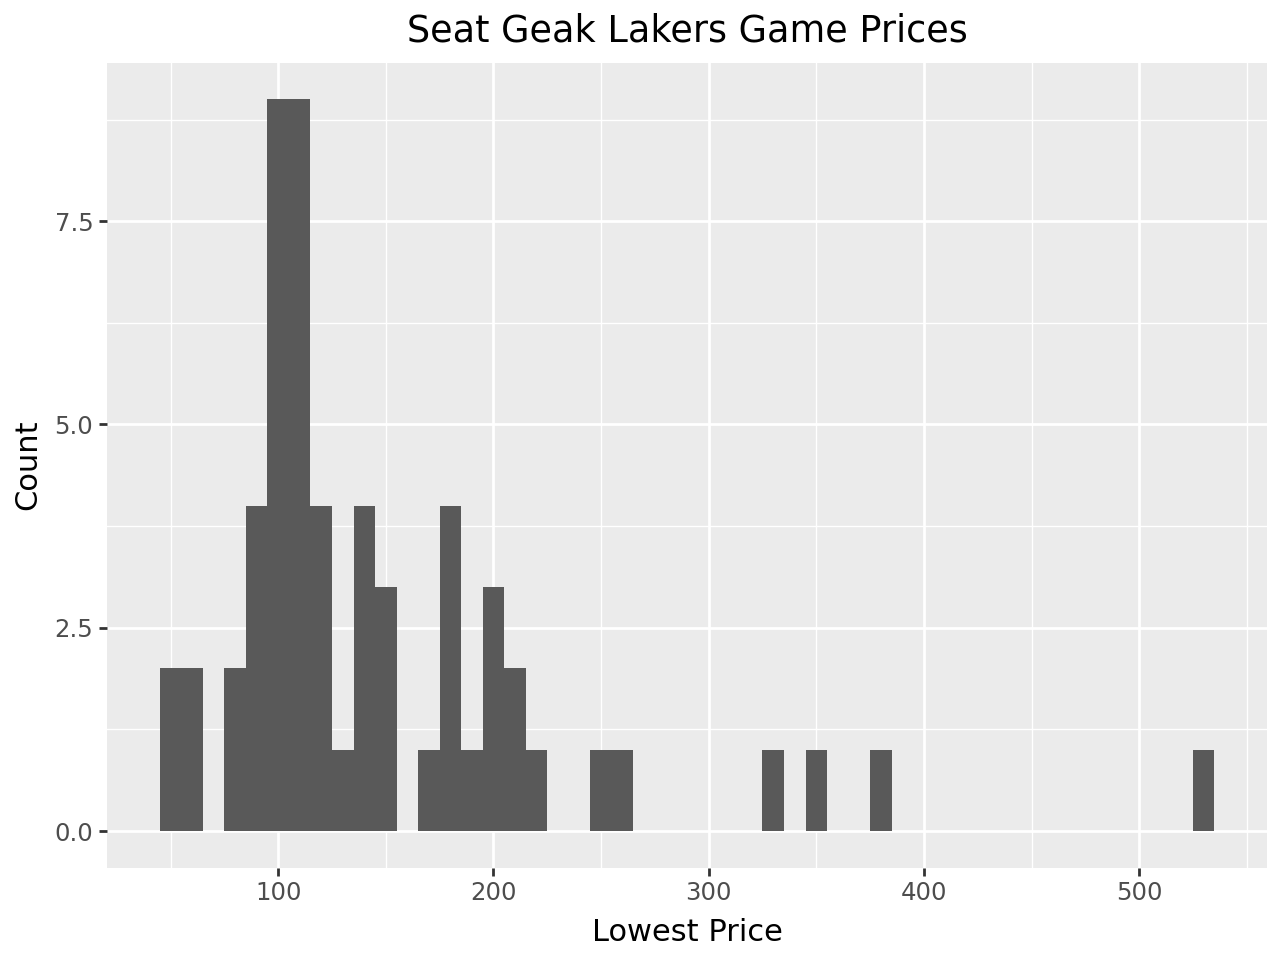

In [10]:
seatgeekPlot = (
    p9.ggplot(seatgeek, p9.aes(x = "lowest price lower bound"))
    + p9.geom_histogram(binwidth = 10)
    + p9.labs(title = "Seat Geak Lakers Game Prices", x = "Lowest Price", y = "Count")
)
seatgeekPlot.show()

In [12]:
seatgeek["lowest price lower bound"].describe()

count     58.000000
mean     149.482759
std       85.704970
min       50.000000
25%      100.000000
50%      120.000000
75%      180.000000
max      530.000000
Name: lowest price lower bound, dtype: float64

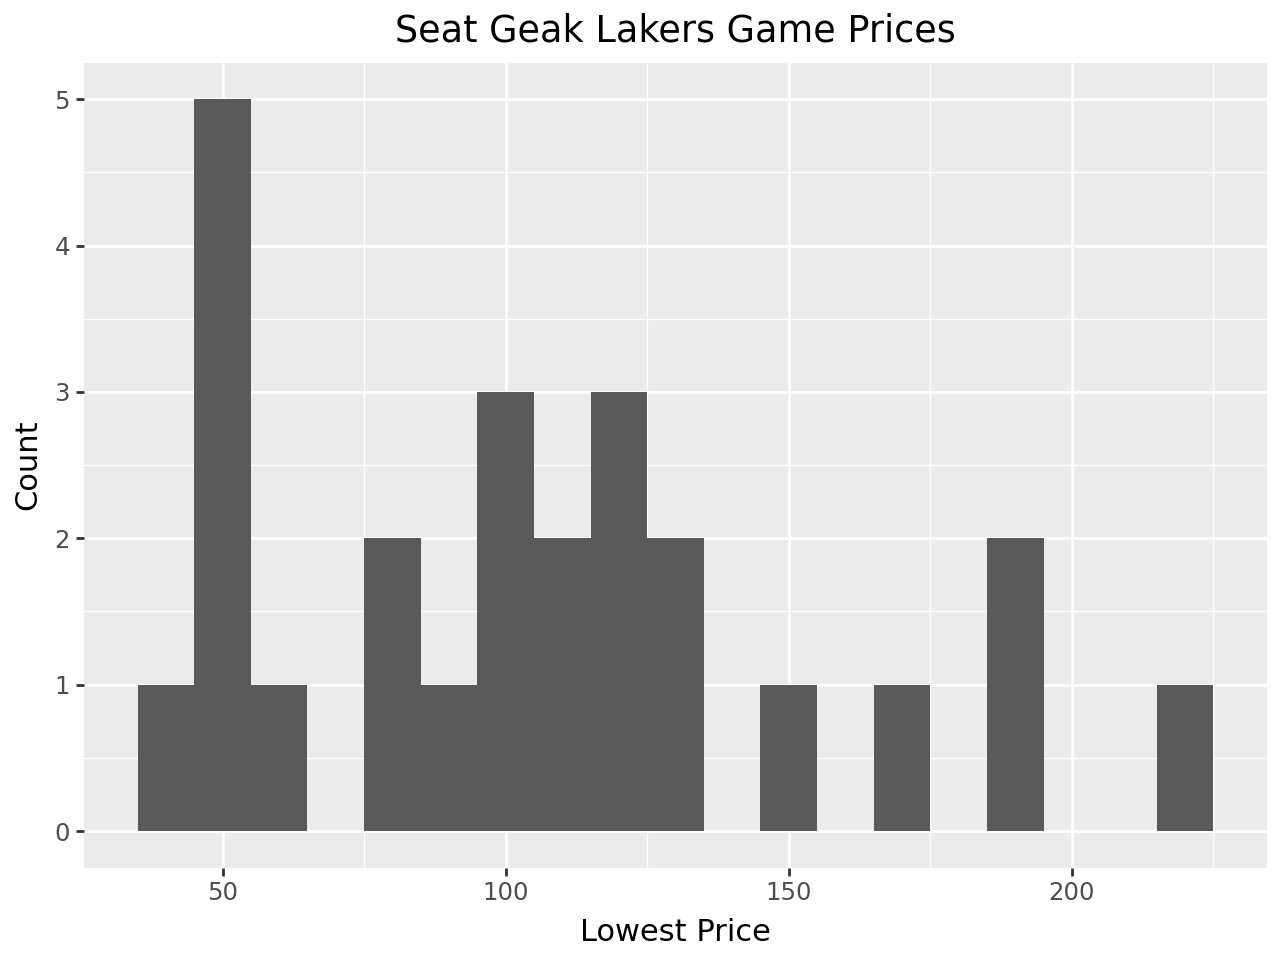

In [11]:
vividPlot = (
    p9.ggplot(vividseats, p9.aes(x = "price_int"))
    + p9.geom_histogram(binwidth = 10)
    + p9.labs(title = "Vivid Seats Lakers Game Prices", x = "Lowest Price", y = "Count")
)
vividPlot.show()

In [13]:
vividseats["price_int"].describe()

count     25.000000
mean     107.360000
std       50.269175
min       44.000000
25%       58.000000
50%      103.000000
75%      129.000000
max      219.000000
Name: price_int, dtype: float64

C:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_bin : Removed 2 rows containing non-finite values.


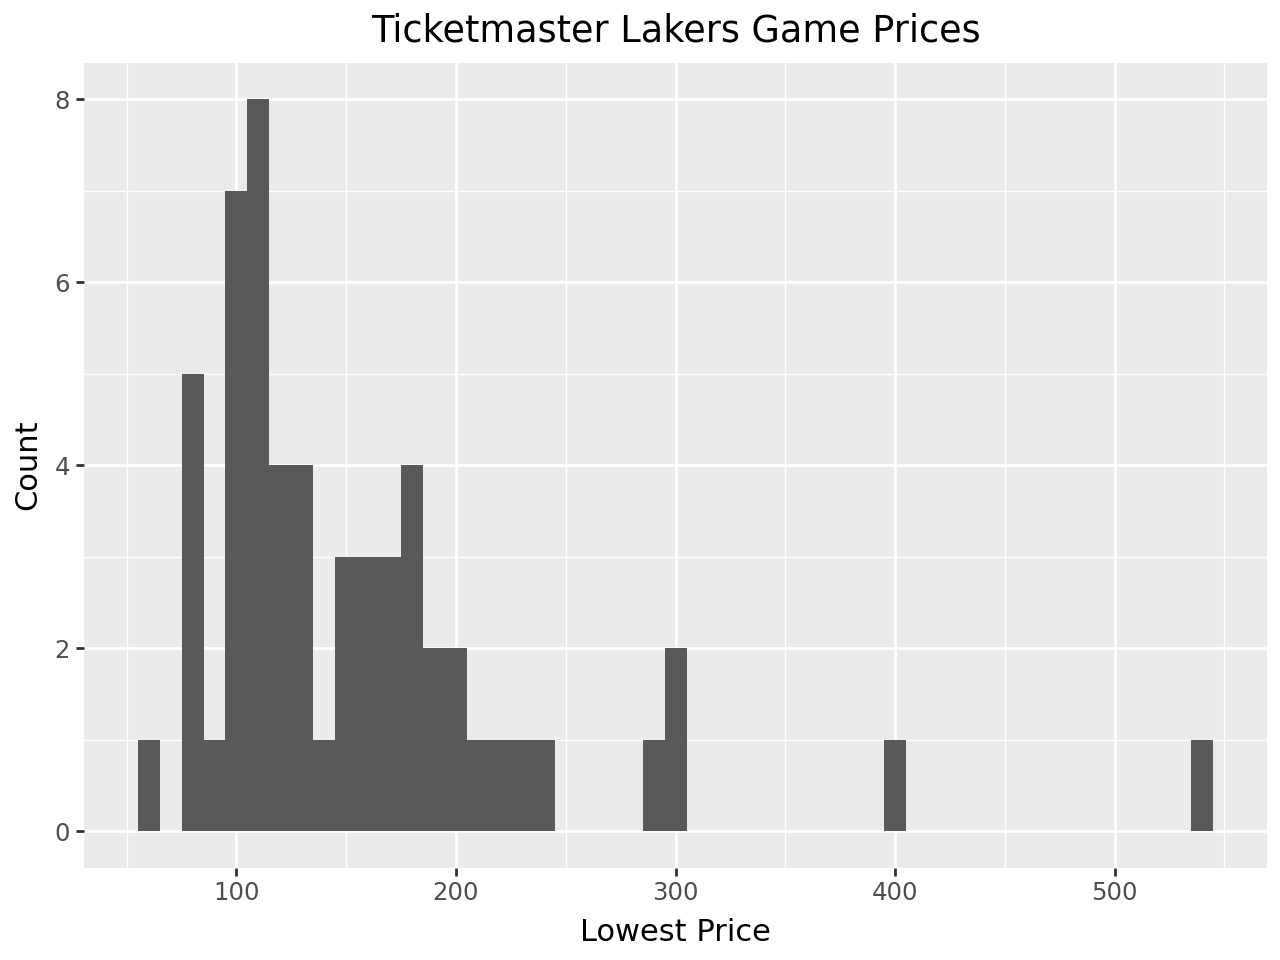

In [15]:
tmasterPlot = (
    p9.ggplot(ticketmaster, p9.aes(x = "scraped_min_price"))
    + p9.geom_histogram(binwidth = 10)
    + p9.labs(title = "Ticketmaster Lakers Game Prices", x = "Lowest Price", y = "Count")
)
tmasterPlot.show()

In [16]:
ticketmaster["scraped_min_price"].describe()

count     57.000000
mean     156.982456
std       83.121574
min       59.000000
25%      108.000000
50%      128.000000
75%      181.000000
max      544.000000
Name: scraped_min_price, dtype: float64